# Straight Line of Stock Histocial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2022-01-01'

# Read data 
dataset = yf.download(symbol,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
2020-01-02 00:00:00+05:30    32443.472656
2020-01-03 00:00:00+05:30    32068.876953
2020-01-06 00:00:00+05:30    31236.787109
2020-01-07 00:00:00+05:30    31399.035156
2020-01-08 00:00:00+05:30    31373.285156
Name: Adj Close, dtype: float64

In [3]:
df = dataset.reset_index()

In [4]:
df.head()

,Date,Adj Close
0,2020-01-02 00:00:00+05:30,32443.472656
1,2020-01-03 00:00:00+05:30,32068.876953
2,2020-01-06 00:00:00+05:30,31236.787109
3,2020-01-07 00:00:00+05:30,31399.035156
4,2020-01-08 00:00:00+05:30,31373.285156


In [5]:
df.tail()

,Date,Adj Close
491,2021-12-27 00:00:00+05:30,35057.492188
492,2021-12-28 00:00:00+05:30,35183.390625
493,2021-12-29 00:00:00+05:30,35044.992188
494,2021-12-30 00:00:00+05:30,35063.195312
495,2021-12-31 00:00:00+05:30,35481.285156


In [6]:
max_p = df['Adj Close'].max()
min_p = df['Adj Close'].min()
avg_p = df['Adj Close'].mean()

In [7]:
data = df.drop(['Date'], axis=1)
data

,Adj Close
0,32443.472656
1,32068.876953
2,31236.787109
3,31399.035156
4,31373.285156
...,...
491,35057.492188
492,35183.390625
493,35044.992188
494,35063.195312


In [8]:
data = data.reset_index()

In [9]:
data.to_numpy()

array([[0.00000000e+00, 3.24434727e+04],
       [1.00000000e+00, 3.20688770e+04],
       [2.00000000e+00, 3.12367871e+04],
       [3.00000000e+00, 3.13990352e+04],
       [4.00000000e+00, 3.13732852e+04],
       [5.00000000e+00, 3.20920273e+04],
       [6.00000000e+00, 3.20970273e+04],
       [7.00000000e+00, 3.21772773e+04],
       [8.00000000e+00, 3.20712773e+04],
       [9.00000000e+00, 3.18245312e+04],
       [1.00000000e+01, 3.18535293e+04],
       [1.10000000e+01, 3.15902832e+04],
       [1.20000000e+01, 3.10802891e+04],
       [1.30000000e+01, 3.09471914e+04],
       [1.40000000e+01, 3.07010918e+04],
       [1.50000000e+01, 3.10036895e+04],
       [1.60000000e+01, 3.12413867e+04],
       [1.70000000e+01, 3.08370410e+04],
       [1.80000000e+01, 3.07610430e+04],
       [1.90000000e+01, 3.08766406e+04],
       [2.00000000e+01, 3.06470449e+04],
       [2.10000000e+01, 3.08332422e+04],
       [2.20000000e+01, 3.00229004e+04],
       [2.30000000e+01, 3.06863418e+04],
       [2.400000

In [10]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [11]:
points = data.to_numpy()

In [12]:
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]


In [13]:
print("Line Equation is y = {m}x + {c}".format(m=m,c=c))


Line Equation is y = 35.48915998626477x + 21138.107645082946


In [14]:
equation_of_line = print("y = {m}x + {c}".format(m=m,c=c))


y = 35.48915998626477x + 21138.107645082946


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


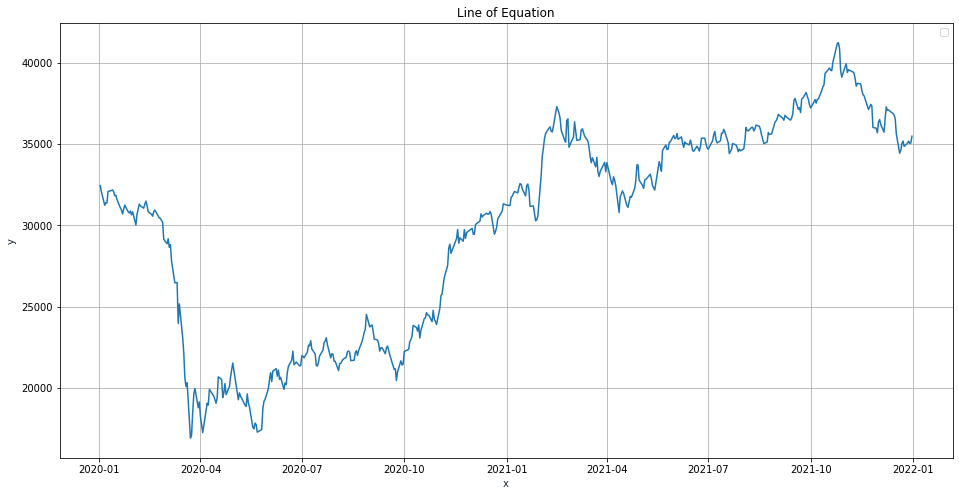

In [15]:
plt.figure(figsize=(16,8))
plt.plot(dataset)
plt.title('Line of Equation', equation_of_line)
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='best')
plt.grid()
plt.show()